## Assignment 3 Pattern Mining and Recommender Systems: Individual Code

### Task 1: Pattern mining

### Chia-Hao Lo, 1907385, Version 03

### 1. Data Loading

#### 1.1 Environment

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder
import networkx as nx
from sklearn.preprocessing import MinMaxScaler


#### 1.2 Loading the data

In [2]:
df_train = pd.read_csv('./data/Groceries data train.csv')
print(df_train.shape)
print(df_train.head())

df_test = pd.read_csv('./data/Groceries data test.csv')
print(df_test.shape)
print(df_test.head())

(26985, 7)
   User_id       Date itemDescription    year  month  day  day_of_week
0   2351.0  1/01/2014         cleaner  2014.0    1.0  1.0          2.0
1   2226.0  1/01/2014         sausage  2014.0    1.0  1.0          2.0
2   1922.0  1/01/2014  tropical fruit  2014.0    1.0  1.0          2.0
3   2943.0  1/01/2014      whole milk  2014.0    1.0  1.0          2.0
4   1249.0  1/01/2014    citrus fruit  2014.0    1.0  1.0          2.0
(19383, 7)
   user_id        Date   itemDescription  year  month  day  day_of_week
0     2889  20/01/2015            yogurt  2015      1   20            1
1     4744  20/01/2015              soda  2015      1   20            1
2     2430  20/01/2015   root vegetables  2015      1   20            1
3     1492  20/01/2015  other vegetables  2015      1   20            1
4     2682  20/01/2015        whole milk  2015      1   20            1


In [3]:
df_train.info()
df_train.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26985 entries, 0 to 26984
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   User_id          19382 non-null  float64
 1   Date             19382 non-null  object 
 2   itemDescription  19382 non-null  object 
 3   year             19382 non-null  float64
 4   month            19382 non-null  float64
 5   day              19382 non-null  float64
 6   day_of_week      19382 non-null  float64
dtypes: float64(5), object(2)
memory usage: 1.4+ MB


,User_id,year,month,day,day_of_week
count,19382.000000,19382.000000,19382.000000,19382.000000,19382.000000
mean,3009.050769,2014.057012,6.166134,15.391342,3.023785
std,1158.135945,0.231871,3.572992,8.750628,1.994446
min,1000.000000,2014.000000,1.000000,1.000000,0.000000
25%,1998.000000,2014.000000,3.000000,8.000000,1.000000
50%,3015.500000,2014.000000,6.000000,15.000000,3.000000
75%,4025.000000,2014.000000,9.000000,23.000000,5.000000
max,5000.000000,2015.000000,12.000000,31.000000,6.000000


In [4]:
df_test.info()
df_test.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19383 entries, 0 to 19382
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   user_id          19383 non-null  int64 
 1   Date             19383 non-null  object
 2   itemDescription  19383 non-null  object
 3   year             19383 non-null  int64 
 4   month            19383 non-null  int64 
 5   day              19383 non-null  int64 
 6   day_of_week      19383 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 1.0+ MB


,user_id,year,month,day,day_of_week
count,19383.000000,19383.0,19383.000000,19383.000000,19383.000000
mean,2998.233246,2015.0,6.788990,16.115101,3.005211
std,1149.072951,0.0,3.254478,8.837280,1.980876
min,1000.000000,2015.0,1.000000,1.000000,0.000000
25%,2007.000000,2015.0,4.000000,8.000000,1.000000
50%,2992.000000,2015.0,7.000000,16.000000,3.000000
75%,3987.000000,2015.0,10.000000,24.000000,5.000000
max,5000.000000,2015.0,12.000000,31.000000,6.000000


In [5]:
print(df_train.nunique())

User_id            3493
Date                384
itemDescription     167
year                  2
month                12
day                  31
day_of_week           7
dtype: int64


In [6]:
print(df_test.nunique())

user_id            3231
Date                345
itemDescription     164
year                  1
month                12
day                  31
day_of_week           7
dtype: int64


In [7]:
# Make feature names consistent
df_train.columns = df_train.columns.str.lower()
df_test.columns = df_test.columns.str.lower()

#### 1.3 Finding missing values

Here we will try to find out the missing values and try to fix the missing values if they are MAR.

In [8]:
missing_train = df_train.isnull().sum()
print(missing_train)

missing_test = df_test.isnull().sum()
print(missing_test)

user_id            7603
date               7603
itemdescription    7603
year               7603
month              7603
day                7603
day_of_week        7603
dtype: int64
user_id            0
date               0
itemdescription    0
year               0
month              0
day                0
day_of_week        0
dtype: int64


In [9]:
print(df_train[df_train.isnull().any(axis=1)])
print(df_test[df_test.isnull().any(axis=1)])

       user_id date itemdescription  year  month  day  day_of_week
19382      NaN  NaN             NaN   NaN    NaN  NaN          NaN
19383      NaN  NaN             NaN   NaN    NaN  NaN          NaN
19384      NaN  NaN             NaN   NaN    NaN  NaN          NaN
19385      NaN  NaN             NaN   NaN    NaN  NaN          NaN
19386      NaN  NaN             NaN   NaN    NaN  NaN          NaN
...        ...  ...             ...   ...    ...  ...          ...
26980      NaN  NaN             NaN   NaN    NaN  NaN          NaN
26981      NaN  NaN             NaN   NaN    NaN  NaN          NaN
26982      NaN  NaN             NaN   NaN    NaN  NaN          NaN
26983      NaN  NaN             NaN   NaN    NaN  NaN          NaN
26984      NaN  NaN             NaN   NaN    NaN  NaN          NaN

[7603 rows x 7 columns]
Empty DataFrame
Columns: [user_id, date, itemdescription, year, month, day, day_of_week]
Index: []


From the columns we found out after 1932 rows, 7603 rows of the data are missing, we will drop these rows and continue with next step.

In [10]:
df_train = df_train.dropna()
df_test = df_test.dropna()

We removed na data.

In [11]:
print(df_train.isnull().sum())
print(df_test.isnull().sum())

user_id            0
date               0
itemdescription    0
year               0
month              0
day                0
day_of_week        0
dtype: int64
user_id            0
date               0
itemdescription    0
year               0
month              0
day                0
day_of_week        0
dtype: int64


In [12]:
print(df_train.info())
print(df_test.info())

<class 'pandas.core.frame.DataFrame'>
Index: 19382 entries, 0 to 19381
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   user_id          19382 non-null  float64
 1   date             19382 non-null  object 
 2   itemdescription  19382 non-null  object 
 3   year             19382 non-null  float64
 4   month            19382 non-null  float64
 5   day              19382 non-null  float64
 6   day_of_week      19382 non-null  float64
dtypes: float64(5), object(2)
memory usage: 1.2+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19383 entries, 0 to 19382
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   user_id          19383 non-null  int64 
 1   date             19383 non-null  object
 2   itemdescription  19383 non-null  object
 3   year             19383 non-null  int64 
 4   month            19383 non-null  int64 
 5 

Now there are 19382 rows of train data left, we will use them to be our data. This number is close to the number 19300 records provided from the assignment instructions. And test data is still 19383 rows.

### 2. EDA

In [13]:
print("Unique Users in training:\t",df_train['user_id'].nunique())
print("Unique Items in training:\t",df_train['itemdescription'].nunique())
print("Unique Users in testing:\t",df_test['user_id'].nunique())
print("Unique Items in testing:\t",df_test['itemdescription'].nunique())

Unique Users in training:	 3493
Unique Items in training:	 167
Unique Users in testing:	 3231
Unique Items in testing:	 164


In [14]:
df_train['itemdescription'].value_counts().head(10)

itemdescription
whole milk          1135
other vegetables     916
rolls/buns           878
soda                 816
yogurt               678
bottled water        525
root vegetables      512
shopping bags        455
pastry               421
tropical fruit       410
Name: count, dtype: int64

In [15]:
df_train['itemdescription'].value_counts().tail(10)

itemdescription
hair spray               5
salad dressing           4
whisky                   4
rubbing alcohol          3
make up remover          3
frozen chicken           2
bags                     1
preservation products    1
kitchen utensil          1
baby cosmetics           1
Name: count, dtype: int64

Here we can see that there are 167 items in the train dataset itemDescription and above columns show the top 10 and bottom 10 items.

In [16]:
df_test['itemdescription'].value_counts().head(10)


itemdescription
whole milk          1367
other vegetables     982
rolls/buns           838
sausage              706
soda                 698
yogurt               656
tropical fruit       622
root vegetables      559
citrus fruit         521
frankfurter          476
Name: count, dtype: int64

In [17]:
df_test['itemdescription'].value_counts().tail(10)

itemdescription
honey                   4
decalcifier             4
liqueur                 4
frozen chicken          3
bags                    3
make up remover         2
salad dressing          2
baby cosmetics          2
rubbing alcohol         2
specialty vegetables    1
Name: count, dtype: int64

Here we can see that there are 164 items in the test dataset itemDescription and above columns show the top 10 and bottom 10 items.

In [18]:
# Find missing items in test data
missing_items = set(df_test['itemdescription']) - set(df_train['itemdescription'])
missing_items = list(missing_items)
missing_items.sort()
print(missing_items)
print(len(missing_items))

[]
0


Here we checked if there are any items missed in test dataset.

In [19]:
# Find missing users in test data
missing_users = set(df_test['user_id']) - set(df_train['user_id'])
missing_users = list(missing_users)
missing_users.sort()
print(missing_users)
print(len(missing_users))


[1008, 1016, 1024, 1029, 1039, 1042, 1044, 1046, 1048, 1067, 1090, 1093, 1096, 1112, 1117, 1119, 1135, 1149, 1156, 1177, 1183, 1213, 1222, 1226, 1228, 1251, 1273, 1292, 1306, 1313, 1319, 1324, 1326, 1334, 1348, 1357, 1368, 1375, 1394, 1397, 1401, 1406, 1409, 1414, 1439, 1455, 1459, 1464, 1467, 1484, 1485, 1502, 1503, 1505, 1518, 1539, 1555, 1558, 1570, 1577, 1614, 1626, 1631, 1656, 1667, 1669, 1670, 1683, 1688, 1695, 1701, 1744, 1763, 1775, 1790, 1804, 1812, 1845, 1846, 1857, 1858, 1861, 1872, 1873, 1874, 1875, 1876, 1884, 1901, 1909, 1918, 1920, 1936, 1952, 1953, 1960, 1963, 1968, 1973, 1974, 1976, 1977, 1989, 1992, 2002, 2007, 2021, 2039, 2046, 2061, 2073, 2095, 2096, 2101, 2103, 2117, 2128, 2136, 2145, 2167, 2171, 2179, 2190, 2200, 2203, 2208, 2216, 2220, 2227, 2248, 2249, 2250, 2260, 2263, 2265, 2275, 2281, 2282, 2286, 2292, 2326, 2327, 2368, 2378, 2386, 2392, 2397, 2422, 2429, 2462, 2465, 2474, 2485, 2487, 2494, 2500, 2503, 2513, 2516, 2558, 2563, 2566, 2572, 2575, 2582, 2583, 258

Here we found 405 users did not appear in the train dataset.

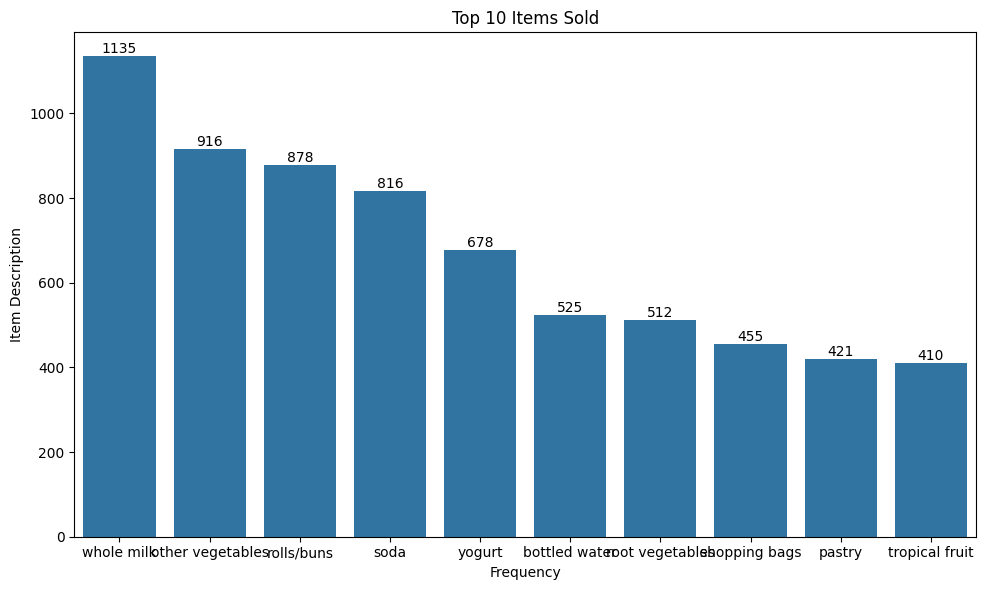

In [20]:
# Top 10 items sold in training data
item_distribution = df_train['itemdescription'].value_counts().reset_index(name='frequency')
item_distribution = item_distribution.rename(columns={'index': 'itemdescription'})
item_distribution = item_distribution.sort_values(by='frequency', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='itemdescription', y='frequency', data=item_distribution)
plt.title('Top 10 Items Sold')
plt.xlabel('Frequency')
plt.ylabel('Item Description')
for index, row in item_distribution.iterrows():
    plt.text(index, row['frequency'], row['frequency'], ha='center', va='bottom', fontsize=10)
plt.tight_layout()
plt.show()


In [21]:
# Lowest 10 items sold in training data
item_distribution = item_distribution.sort_values(by='frequency', ascending=True).head(10)
item_distribution

,itemdescription,frequency
9,tropical fruit,410
8,pastry,421
7,shopping bags,455
6,root vegetables,512
5,bottled water,525
4,yogurt,678
3,soda,816
2,rolls/buns,878
1,other vegetables,916
0,whole milk,1135


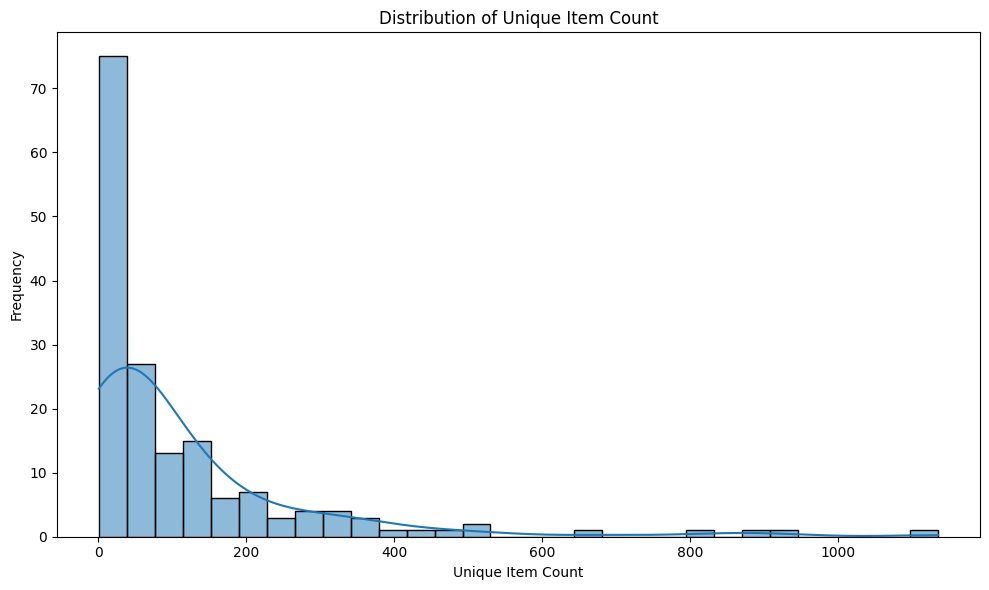

In [22]:
# Distribution of unique item count
plt.figure(figsize=(10, 6))
sns.histplot(df_train['itemdescription'].value_counts(), bins=30, kde=True)
plt.title('Distribution of Unique Item Count')
plt.xlabel('Unique Item Count')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

From the plot we can see that whole milk is the top frequency sales in the store. By the contrast, bags, preservation products, kitchen utensil, and baby cosmetics are the lowest frequency sales.

3493
5.235614085313484


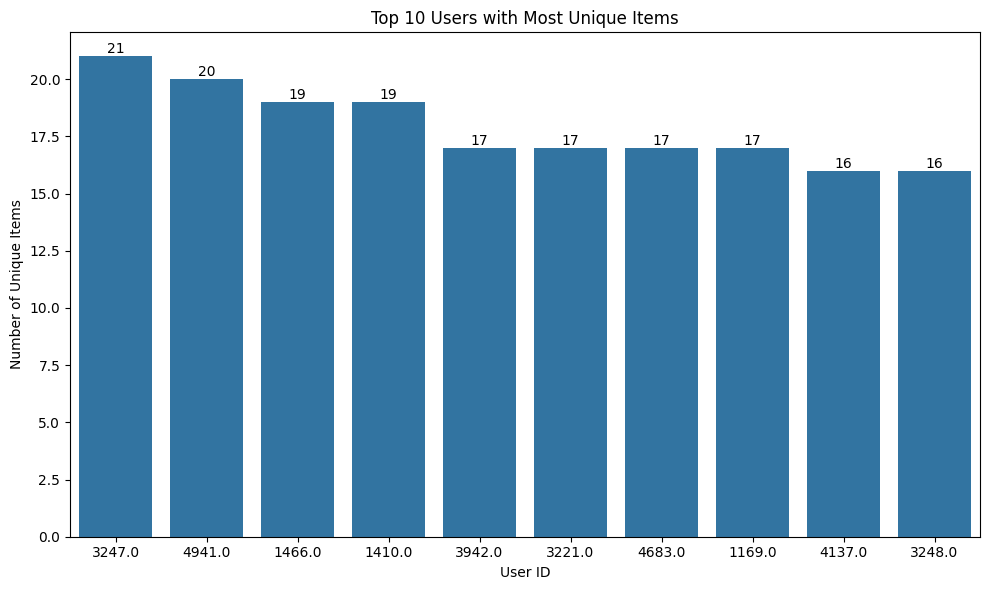

In [23]:
# User Behavior (Top 10 Users with Most Unique Items)
user_basket_counts = df_train.groupby('user_id')['itemdescription'].nunique()
number_of_users = len(user_basket_counts)
avg_basket_per_user = user_basket_counts.mean()
top_users = user_basket_counts.sort_values(ascending=False).head(10)
print(number_of_users)
print(avg_basket_per_user)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_users.index, y=top_users.values, order=top_users.index)
plt.title('Top 10 Users with Most Unique Items')
plt.xlabel('User ID')
plt.ylabel('Number of Unique Items')
for index, value in enumerate(top_users):
    plt.text(index, value, str(value), ha='center', va='bottom', fontsize=10)
plt.tight_layout()
plt.show()

Here we checked the user behavior and we get there are total 3493 users and for average purchasing items are 5.24. In the column we can find the top 10 users.

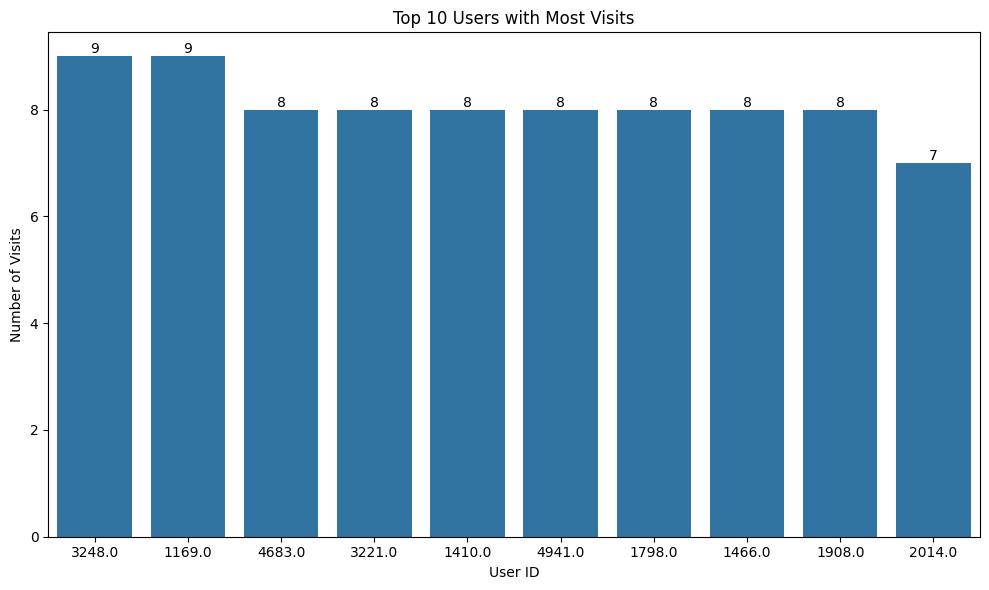

In [24]:
#   User Behavior(Top 10 Users with Most Visits)
user_visits = df_train.groupby('user_id')['date'].nunique()
most_frequent_users = user_visits.sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=most_frequent_users.index, y=most_frequent_users.values, order=most_frequent_users.index)
plt.title('Top 10 Users with Most Visits')
plt.xlabel('User ID')
plt.ylabel('Number of Visits')
for index, value in enumerate(most_frequent_users):
    plt.text(index, value, str(value), ha='center', va='bottom', fontsize=10)
plt.tight_layout()
plt.show()

<Figure size 1400x700 with 0 Axes>

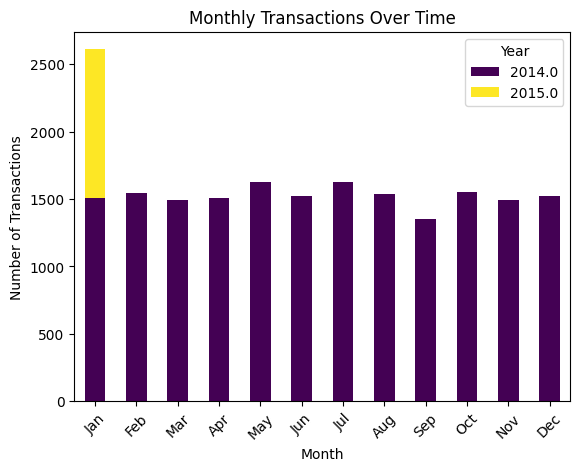

In [25]:
# Grouping by year and month
monthly_counts = df_train.groupby(['year', 'month']).size().unstack()

plt.figure(figsize=(14, 7))
monthly_counts.T.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Monthly Transactions Over Time')
plt.xlabel('Month')
plt.xticks(ticks=range(len(monthly_counts.columns)), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.ylabel('Number of Transactions')
plt.legend(title='Year')
plt.xticks(rotation=45)
plt.show()

,day_of_week,itemdescription,count
0,0.0,whole milk,165
1,0.0,rolls/buns,128
2,0.0,soda,119
3,0.0,other vegetables,106
4,0.0,yogurt,101
5,1.0,other vegetables,150
6,1.0,whole milk,147
7,1.0,rolls/buns,117
8,1.0,soda,110
9,1.0,yogurt,93


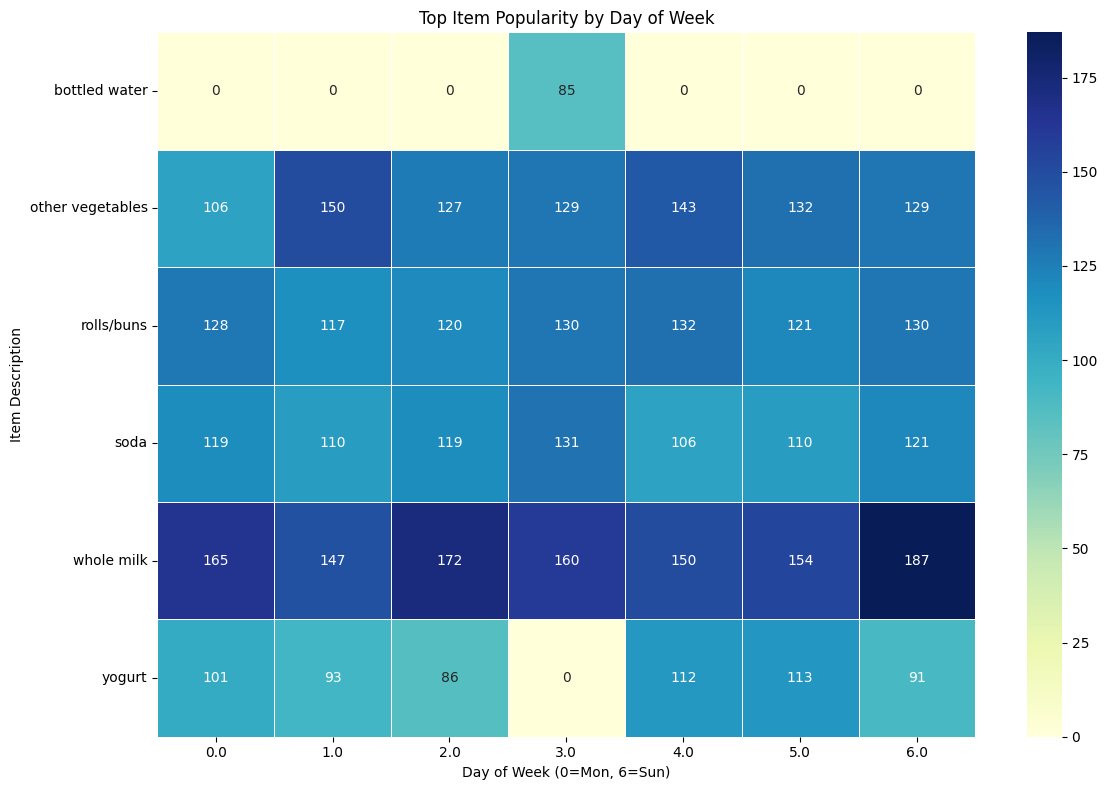

In [26]:
popular_by_day = (
    df_train.groupby(['day_of_week', 'itemdescription'])
    .size()
    .reset_index(name='count')
)

top_items_by_day = (
    popular_by_day.sort_values(['day_of_week', 'count'], ascending=[True, False])
    .groupby('day_of_week')
    .head(5)
    .reset_index(drop=True)
)
display(top_items_by_day)

heatmap_data = top_items_by_day.pivot_table(index='itemdescription', columns='day_of_week', values='count', fill_value=0)

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, fmt=".0f", cmap="YlGnBu", linewidths=0.5)
plt.title("Top Item Popularity by Day of Week")
plt.xlabel("Day of Week (0=Mon, 6=Sun)")
plt.ylabel("Item Description")
plt.tight_layout()
plt.show()

We can see that according to day od week, there is no specific patterns, mostly people buy them everyday. There is no specific items that people buy it in specific day of week.

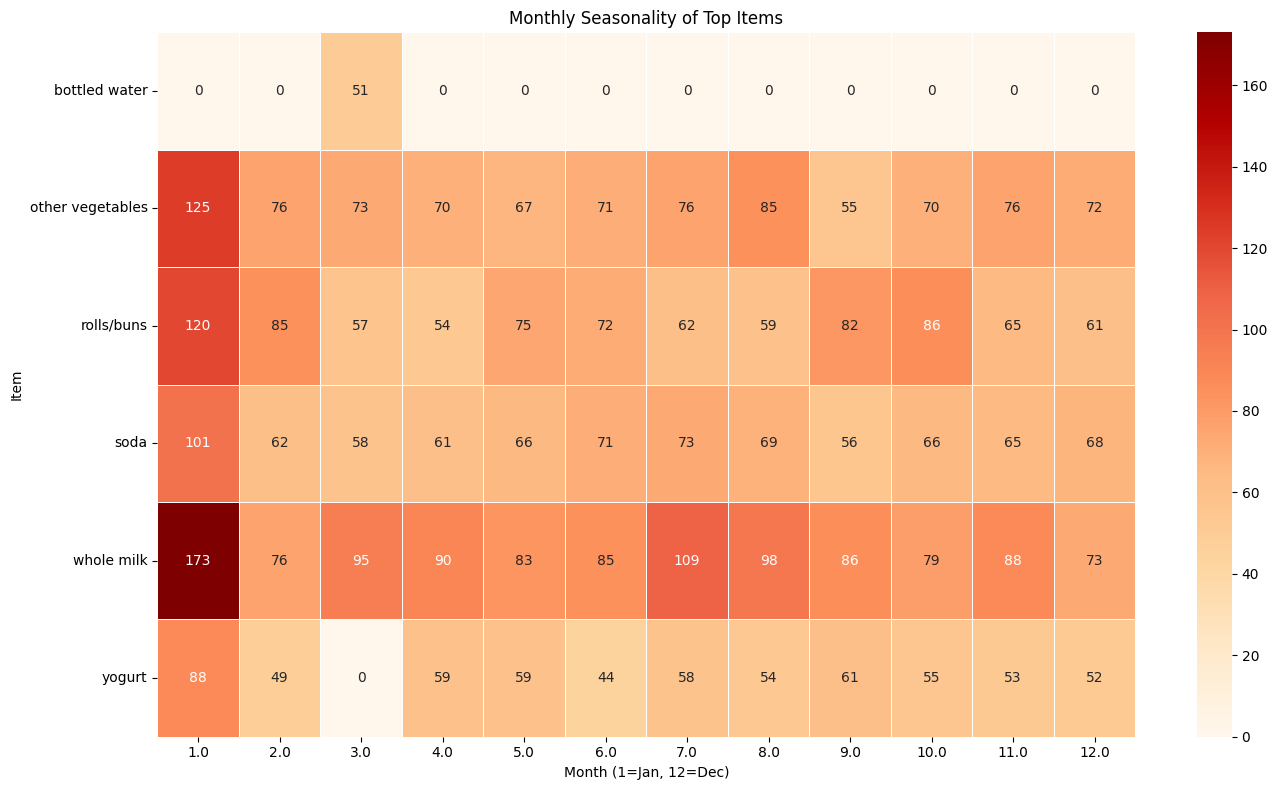

In [27]:
monthly_counts = (
    df_train.groupby(['month', 'itemdescription'])
    .size()
    .reset_index(name='count')
)

top_items_by_month = (
    monthly_counts.sort_values(['month', 'count'], ascending=[True, False])
    .groupby('month')
    .head(5)
    .reset_index(drop=True)
)

heatmap_data_month = top_items_by_month.pivot_table(
    index='itemdescription',
    columns='month',
    values='count',
    fill_value=0
)


plt.figure(figsize=(14, 8))
sns.heatmap(heatmap_data_month.astype(int), annot=True, fmt='d', cmap='OrRd', linewidths=0.5)
plt.title("Monthly Seasonality of Top Items")
plt.xlabel("Month (1=Jan, 12=Dec)")
plt.ylabel("Item")
plt.tight_layout()
plt.show()

We explored weekly and monthly item purchase patterns to detect potential seasonality or time-based behaviors. But our heatmap analysis showed no strong or consistent variation in item popularity across days or months.

### 2. Pre-processing data

In [28]:
# ! pip install mlxtend

#### 2.1 Training dataset processing

In [29]:
# Convert data to transactions
data1 = df_train.copy()
data1 = data1.dropna(subset=['user_id', 'itemdescription', 'year', 'month', 'day'])

# Filter out low-frequency items (appear > 20 times overall)
item_counts = data1['itemdescription'].value_counts()
frequent_items = item_counts[item_counts > 20].index
data1 = data1[data1['itemdescription'].isin(frequent_items)]

# Create a transaction ID for each unique transaction
data1['transaction'] = (
    data1['user_id'].astype(str) + '_' +
    data1['year'].astype(str) + '_' +
    data1['month'].astype(str).str.zfill(2)
)

transaction = data1.groupby(['transaction'])['itemdescription'].apply(list).tolist()

#### 2.2 Encoding

In [30]:
te = TransactionEncoder()
data1_encoded = pd.DataFrame(te.fit(transaction).transform(transaction), columns=te.columns_)

#### 3. Apriori implement

In [ ]:
# Mines itemsets that occur at least 1% of all baskets
frequent_itemsets = apriori(data1_encoded, min_support=0.0015, use_colnames=True)

# Generate association rules
rules_conf = association_rules(frequent_itemsets, metric='confidence', min_threshold=0.1)
rules_lift = association_rules(frequent_itemsets, metric='lift', min_threshold=1.2)
rules_lev = association_rules(frequent_itemsets, metric='leverage', min_threshold=0.001)

# Combine and deduplicate
rules = pd.concat([rules_conf, rules_lift, rules_lev]).drop_duplicates()

# Add combo score
rules['combo_score'] = rules['confidence'] * rules['lift']

# Remove redundant (mirror) rules
# Remove mirrored (redundant) rules
def is_redundant(rule, all_rules):
    return any(
        rule['antecedents'] == r['consequents'] and rule['consequents'] == r['antecedents']
        for _, r in all_rules.iterrows()
    )

rules['redundant'] = rules.apply(lambda r: is_redundant(r, rules), axis=1)
rules = rules[~rules['redundant']]

In [42]:
item_freq = data1['itemdescription'].value_counts(normalize=True)

rules['consequent_freq'] = rules['consequents'].apply(
    lambda x: item_freq.get(list(x)[0], 0))
rules['surprise_score'] = (1-rules['consequent_freq']) * rules['confidence']

rules['antecedent_freq'] = rules['antecedents'].apply(
    lambda x: item_freq.get(list(x)[0], 0))
rules['rec_value'] = rules['lift'] * rules['confidence'] * (1 / (rules['antecedent_freq'] + 0.01))

scaler = MinMaxScaler()
scaled_metrics = scaler.fit_transform(rules[['confidence', 'lift', 'leverage']])
rules[['conf_scaled', 'lift_scaled', 'lev_scaled']] = scaled_metrics
rules['NUS'] = rules[['conf_scaled', 'lift_scaled', 'lev_scaled']].mean(axis=1)

In [43]:
top_surprise = rules.sort_values(by='surprise_score', ascending=False).head(5)
top_rec_value = rules.sort_values(by='rec_value', ascending=False).head(5)
top_nus = rules.sort_values(by='NUS', ascending=False).head(5)

top_custom_metrics = pd.concat([
    top_surprise.assign(metric='Surprise Score'),
    top_rec_value.assign(metric='Recommendation Value'),
    top_nus.assign(metric='NUS')
])

display(top_custom_metrics[['antecedents', 'consequents', 'confidence', 'lift', 'leverage',
                                   'surprise_score', 'rec_value', 'NUS', 'metric']])


,antecedents,consequents,confidence,lift,leverage,surprise_score,rec_value,NUS,metric
20,(frankfurter),(whole milk),0.166667,1.190850,0.000352,0.156644,12.796159,0.982675,Surprise Score
54,(waffles),(whole milk),0.158824,1.134810,0.000415,0.149272,9.455889,0.908226,Surprise Score
4,(bottled beer),(whole milk),0.144543,1.032773,0.000201,0.135850,5.288530,0.750271,Surprise Score
12,(cat food),(whole milk),0.142857,1.020729,0.000045,0.134266,8.943004,0.722653,Surprise Score
0,(UHT-milk),(other vegetables),0.132530,1.156423,0.000385,0.126098,8.131143,0.789945,Surprise Score
20,(frankfurter),(whole milk),0.166667,1.190850,0.000352,0.156644,12.796159,0.982675,Recommendation Value
44,(processed cheese),(rolls/buns),0.125000,1.151818,0.000205,0.119185,9.543363,0.736717,Recommendation Value
54,(waffles),(whole milk),0.158824,1.134810,0.000415,0.149272,9.455889,0.908226,Recommendation Value
12,(cat food),(whole milk),0.142857,1.020729,0.000045,0.134266,8.943004,0.722653,Recommendation Value
36,(oil),(soda),0.120000,1.184828,0.000303,0.114812,8.525880,0.741695,Recommendation Value


##### Standard metrics
1. Confidence: It tells us the possibility of the consequent occurred given the antecedent. For column 1, there are 16.67% of confidence that customers buying frankfurker will also buy whole milk. 
2. Lift: It shows the strength of the association. Lift > 1 means the antecedent increases likelihood of the consequent.
3. Leverage: Difference between observed frequency and expected if independent. A small positive value means a mild but meaningful relationship.

##### Non-standard metrics
1. Surprise score: This rule shows the consequent is rare(not in top product) and the rule is still confident. It is good for finding unexpected but strong recommendations.
2. Recommendation value(rec_value): This is useful when we search for small group(niche) recommendation. It is mainly rewards with rare antecedents.
3. NUS(normalize utility score): This is the score to find overall score across metrics.

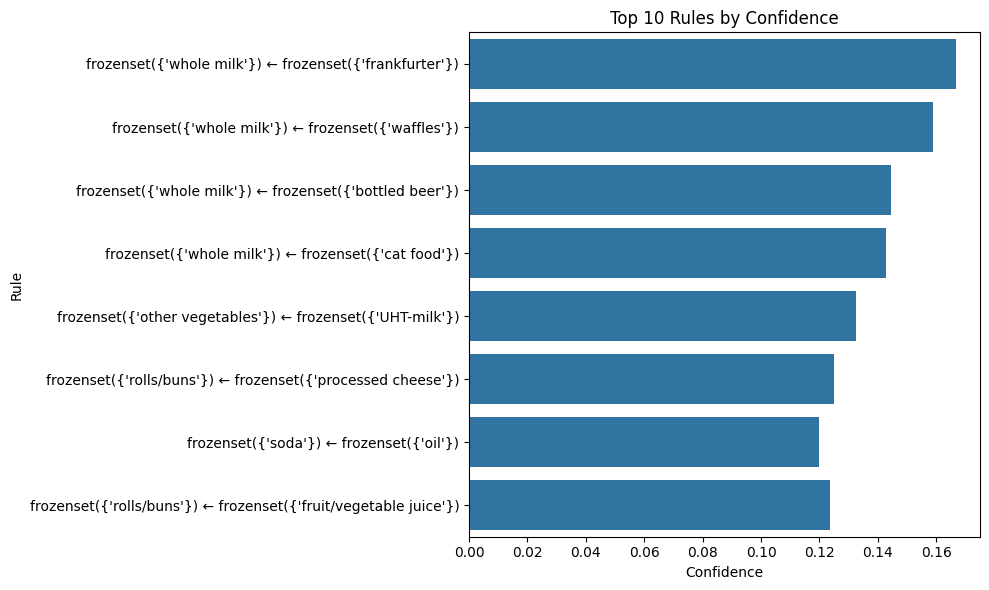

In [45]:
plt.figure(figsize=(10, 6))
sns.barplot(x=top_custom_metrics['confidence'], y=top_custom_metrics['consequents'].astype(str) + ' ← ' + top_custom_metrics['antecedents'].astype(str))
plt.title('Top 10 Rules by Confidence')
plt.xlabel('Confidence')
plt.ylabel('Rule')
plt.tight_layout()
plt.show()

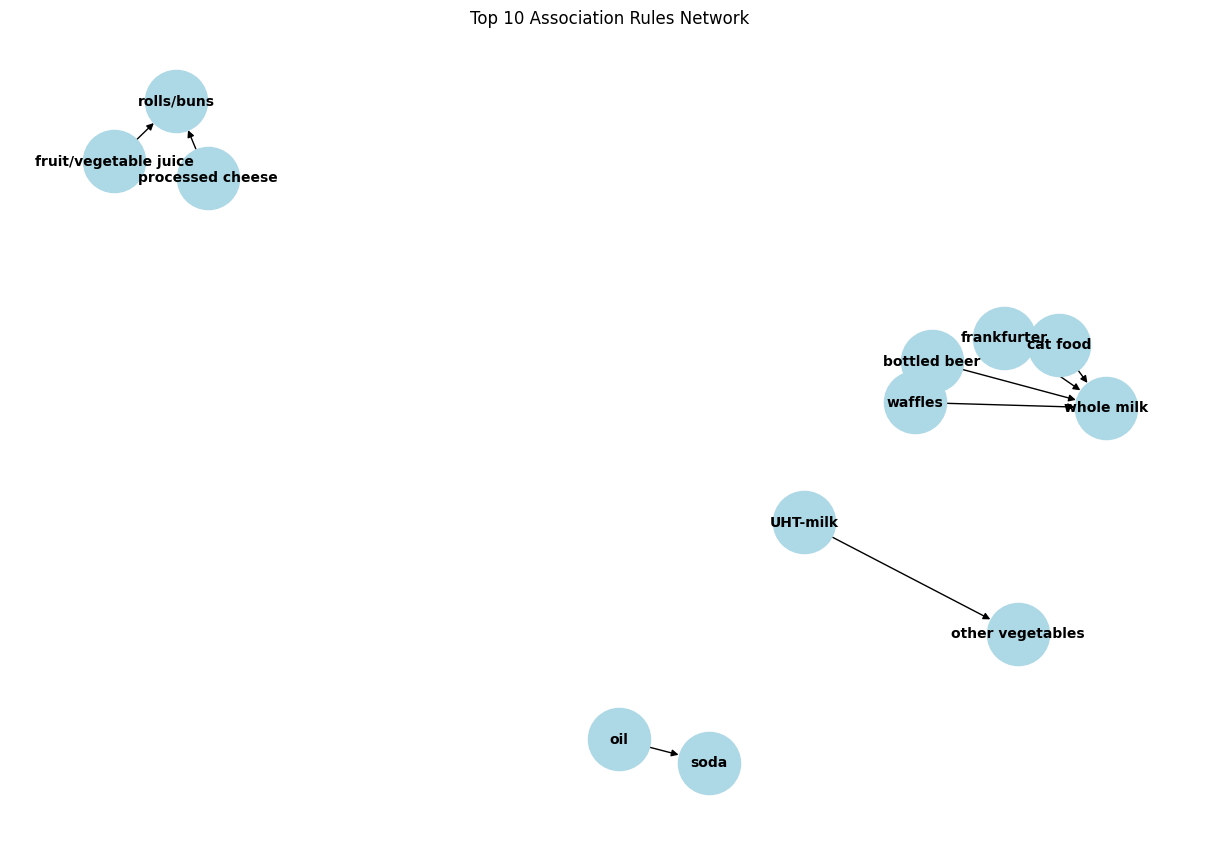

In [47]:
edges = [(str(list(rule['antecedents'])[0]), str(list(rule['consequents'])[0])) for _, rule in top_custom_metrics.iterrows()]
G = nx.DiGraph()
G.add_edges_from(edges)
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True, node_size=2000, node_color='lightblue', font_size=10, font_weight='bold', arrows=True)
plt.title("Top 10 Association Rules Network")
plt.show()

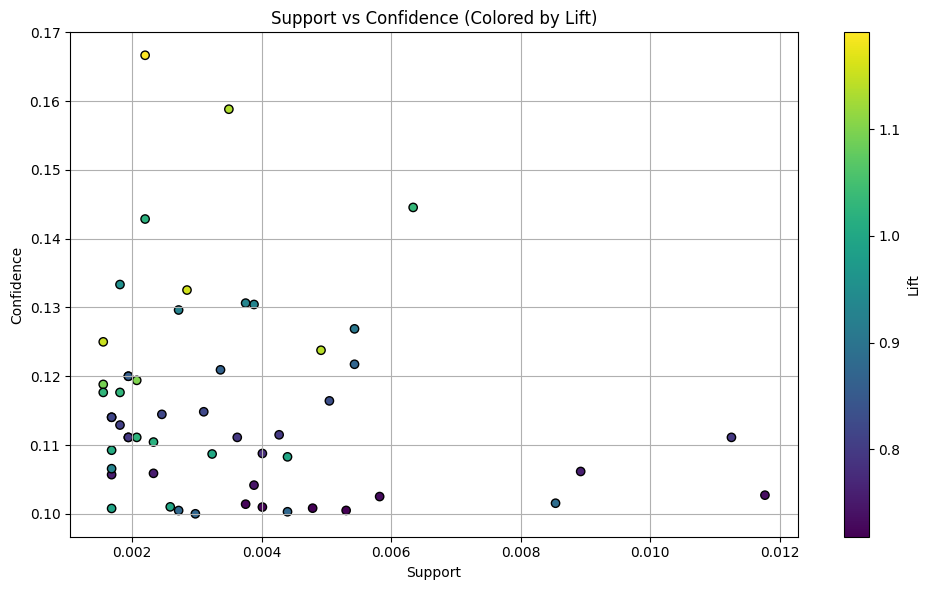

In [48]:
plt.figure(figsize=(10, 6))
scatter = plt.scatter(rules['support'], rules['confidence'], c=rules['lift'], cmap='viridis', edgecolor='k')
plt.colorbar(scatter, label='Lift')
plt.title('Support vs Confidence (Colored by Lift)')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.grid(True)
plt.tight_layout()
plt.show()

In [49]:
# Top 10 items
top_items = df_train['itemdescription'].value_counts().head(10).index.tolist()
existing_users = df_train['user_id'].unique()

# Create a function to recommend for any user
def recommend_items(user_id, top_n=5):
    if user_id in existing_users:
        # Get all items the user has already bought
        user_purchases = df_train[df_train['User_id'] == user_id]['itemDescription'].unique()
        # Recommend popular items the user hasn't bought yet
        recommendations = [item for item in top_items if item not in user_purchases]
        return recommendations[:top_n]
    else:
        # New user: recommend top N most popular items directly
        return top_items[:top_n]

### 3. Reflection

In version 1, I tried to do some data analysis to see the training dataframe. For version 2, I built a Apriori model. For version 3, I'll try to implement whole part.